# Making affluent neighborhoods financially accessible to low-income earners.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fiona
import geopandas as gpd
from shapely.geometry import Point
import pyproj
import haversine as hs
import warnings
import folium
warnings.filterwarnings('ignore')

# wgs84 = pyproj.Proj(init="epsg:4326")
# InputGrid = pyproj.Proj(projparams = 'NAD83')

### Load housing data

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df['coord'] = list(zip(df.long,df.lat))
df['geometry'] = df.apply(lambda x: Point((x.long, x.lat)), axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### Transform housing data to a geodataframe

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,"(-122.257, 47.5112)",POINT (-122.257 47.5112)
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,"(-122.319, 47.721)",POINT (-122.319 47.721)
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,"(-122.233, 47.7379)",POINT (-122.233 47.7379)
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,"(-122.393, 47.5208)",POINT (-122.393 47.5208)
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,"(-122.045, 47.6168)",POINT (-122.045 47.6168)


In [7]:
housing_gdf = gpd.GeoDataFrame(df, crs="EPSG:4326")

housing_gdf.to_crs(epsg = 32148, inplace = True)
housing_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21597 non-null  int64   
 1   date           21597 non-null  object  
 2   price          21597 non-null  float64 
 3   bedrooms       21597 non-null  int64   
 4   bathrooms      21597 non-null  float64 
 5   sqft_living    21597 non-null  int64   
 6   sqft_lot       21597 non-null  int64   
 7   floors         21597 non-null  float64 
 8   waterfront     19221 non-null  object  
 9   view           21534 non-null  object  
 10  condition      21597 non-null  object  
 11  grade          21597 non-null  object  
 12  sqft_above     21597 non-null  int64   
 13  sqft_basement  21597 non-null  object  
 14  yr_built       21597 non-null  int64   
 15  yr_renovated   17755 non-null  float64 
 16  zipcode        21597 non-null  int64   
 17  lat            21597 no

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21597 non-null  int64   
 1   date           21597 non-null  object  
 2   price          21597 non-null  float64 
 3   bedrooms       21597 non-null  int64   
 4   bathrooms      21597 non-null  float64 
 5   sqft_living    21597 non-null  int64   
 6   sqft_lot       21597 non-null  int64   
 7   floors         21597 non-null  float64 
 8   waterfront     19221 non-null  object  
 9   view           21534 non-null  object  
 10  condition      21597 non-null  object  
 11  grade          21597 non-null  object  
 12  sqft_above     21597 non-null  int64   
 13  sqft_basement  21597 non-null  object  
 14  yr_built       21597 non-null  int64   
 15  yr_renovated   17755 non-null  float64 
 16  zipcode        21597 non-null  int64   
 17  lat            21597 non-null  

### Load shapefile data for cities in King county

In [8]:
kc_cities_gdf = gpd.read_file('../data/Cities_and_Unincorporated_King_County___city_kc_area/Cities_and_Unincorporated_King_County___city_kc_area.shp')
kc_cities_gdf.to_crs(epsg = 32148, inplace = True)

In [9]:
kc_cities_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    100 non-null    int64   
 1   JURIS       100 non-null    object  
 2   CITYNAME    100 non-null    object  
 3   SHAPE_Leng  100 non-null    float64 
 4   SHAPE_Area  100 non-null    float64 
 5   geometry    100 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 4.8+ KB


In [10]:
kc_cities_gdf.head()

,OBJECTID,JURIS,CITYNAME,SHAPE_Leng,SHAPE_Area,geometry
0,1,AL,Algona,38144.667179,3.641105e+07,"POLYGON ((393586.141 33607.604, 393361.732 331..."
1,2,AU,Auburn,209231.046799,7.856892e+08,"POLYGON ((394617.054 40308.323, 394823.902 403..."
2,3,BA,Beaux Arts,6720.785802,2.274707e+06,"POLYGON ((396999.450 66157.055, 396999.687 661..."
3,4,BD,Black Diamond,6629.569588,2.412697e+06,"POLYGON ((414627.020 32686.155, 414626.838 326..."
4,5,BD,Black Diamond,85786.107116,1.983661e+08,"POLYGON ((408171.066 38935.667, 408505.289 389..."


"Unincorporated" cities in King County is labeled "King County" in the dataset. King County's official definition of Unincorporated cities is as follows:

Rural unincorporated King County covers central and eastern King County and Vashon Island – areas outside the Urban Growth Boundary. These areas are desig- nated Rural, Agricultural or Forest Resource by the King County Comprehensive Plan.

We will rename unincorporated cities of king county to "Uincorporated City"

Data source: https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::cities-and-unincorporated-king-county-city-kc-area/explore?location=47.430582%2C-121.809200%2C10.02

In [11]:
kc_cities_gdf['CITYNAME'].value_counts()

King County         38
Enumclaw             7
Kent                 6
Carnation            3
Snoqualmie           3
Redmond              3
Black Diamond        2
Bothell              2
Des Moines           2
Duvall               2
Renton               2
Skykomish            2
Newcastle            1
Normandy Park        1
Pacific              1
Algona               1
Seattle              1
Shoreline            1
Maple Valley         1
Sammamish            1
SeaTac               1
Tukwila              1
Woodinville          1
North Bend           1
Lake Forest Park     1
Milton               1
Mercer Island        1
Medina               1
Auburn               1
Kenmore              1
Kirkland             1
Issaquah             1
Hunts Point          1
Federal Way          1
Covington            1
Clyde Hill           1
Burien               1
Bellevue             1
Beaux Arts           1
Yarrow Point         1
Name: CITYNAME, dtype: int64

In [12]:
kc_cities_gdf['CITYNAME'] = kc_cities_gdf['CITYNAME'].str.replace('King County', 'Unincorporated City')
kc_cities_gdf['CITYNAME'].unique()

array(['Algona', 'Auburn', 'Beaux Arts', 'Black Diamond', 'Bellevue',
       'Bothell', 'Burien', 'Carnation', 'Clyde Hill', 'Covington',
       'Des Moines', 'Duvall', 'Enumclaw', 'Federal Way', 'Hunts Point',
       'Issaquah', 'Unincorporated City', 'Kent', 'Kirkland', 'Kenmore',
       'Lake Forest Park', 'Medina', 'Mercer Island', 'Milton',
       'Maple Valley', 'North Bend', 'Newcastle', 'Normandy Park',
       'Pacific', 'Redmond', 'Renton', 'Seattle', 'Shoreline',
       'Skykomish', 'Sammamish', 'Snoqualmie', 'SeaTac', 'Tukwila',
       'Woodinville', 'Yarrow Point'], dtype=object)

In [13]:
kc_cities_gdf

,OBJECTID,JURIS,CITYNAME,SHAPE_Leng,SHAPE_Area,geometry
0,1,AL,Algona,38144.667179,3.641105e+07,"POLYGON ((393586.141 33607.604, 393361.732 331..."
1,2,AU,Auburn,209231.046799,7.856892e+08,"POLYGON ((394617.054 40308.323, 394823.902 403..."
2,3,BA,Beaux Arts,6720.785802,2.274707e+06,"POLYGON ((396999.450 66157.055, 396999.687 661..."
3,4,BD,Black Diamond,6629.569588,2.412697e+06,"POLYGON ((414627.020 32686.155, 414626.838 326..."
4,5,BD,Black Diamond,85786.107116,1.983661e+08,"POLYGON ((408171.066 38935.667, 408505.289 389..."
...,...,...,...,...,...,...
95,96,SN,Snoqualmie,114948.303878,2.010589e+08,"POLYGON ((425098.899 61501.002, 425112.006 614..."
96,97,ST,SeaTac,101640.458450,2.866419e+08,"POLYGON ((389228.352 55399.807, 389248.975 553..."
97,98,TU,Tukwila,125946.874691,2.683084e+08,"POLYGON ((390193.459 58404.853, 390176.499 577..."
98,99,WO,Woodinville,89644.620707,1.577311e+08,"POLYGON ((404098.674 86275.309, 404098.232 862..."


In [14]:
kc_cities_gdf['centroid'] = kc_cities_gdf.centroid

In [15]:
kc_cities_gdf.head()

,OBJECTID,JURIS,CITYNAME,SHAPE_Leng,SHAPE_Area,geometry,centroid
0,1,AL,Algona,38144.667179,3.641105e+07,"POLYGON ((393586.141 33607.604, 393361.732 331...",POINT (392791.391 32339.325)
1,2,AU,Auburn,209231.046799,7.856892e+08,"POLYGON ((394617.054 40308.323, 394823.902 403...",POINT (395834.289 35069.659)
2,3,BA,Beaux Arts,6720.785802,2.274707e+06,"POLYGON ((396999.450 66157.055, 396999.687 661...",POINT (397138.139 65993.350)
3,4,BD,Black Diamond,6629.569588,2.412697e+06,"POLYGON ((414627.020 32686.155, 414626.838 326...",POINT (414505.834 32499.483)
4,5,BD,Black Diamond,85786.107116,1.983661e+08,"POLYGON ((408171.066 38935.667, 408505.289 389...",POINT (410359.775 35532.648)


In [16]:
#Seattle centroid

seattle_centroid = kc_cities_gdf[kc_cities_gdf['CITYNAME']=='Seattle']
seattle_centroid = seattle_centroid.iloc[0,-1]
type(seattle_centroid)

shapely.geometry.point.Point

In [17]:
kc_cities_gdf['distance_seattle'] = kc_cities_gdf['centroid'].distance(seattle_centroid)
kc_cities_gdf.head()

,OBJECTID,JURIS,CITYNAME,SHAPE_Leng,SHAPE_Area,geometry,centroid,distance_seattle
0,1,AL,Algona,38144.667179,3.641105e+07,"POLYGON ((393586.141 33607.604, 393361.732 331...",POINT (392791.391 32339.325),38210.789361
1,2,AU,Auburn,209231.046799,7.856892e+08,"POLYGON ((394617.054 40308.323, 394823.902 403...",POINT (395834.289 35069.659),36245.361339
2,3,BA,Beaux Arts,6720.785802,2.274707e+06,"POLYGON ((396999.450 66157.055, 396999.687 661...",POINT (397138.139 65993.350),11935.852118
3,4,BD,Black Diamond,6629.569588,2.412697e+06,"POLYGON ((414627.020 32686.155, 414626.838 326...",POINT (414505.834 32499.483),47120.537344
4,5,BD,Black Diamond,85786.107116,1.983661e+08,"POLYGON ((408171.066 38935.667, 408505.289 389...",POINT (410359.775 35532.648),42216.811494


In [18]:
kc_cities_gdf[kc_cities_gdf['CITYNAME'] == 'Seattle']

,OBJECTID,JURIS,CITYNAME,SHAPE_Leng,SHAPE_Area,geometry,centroid,distance_seattle
88,89,SE,Seattle,341855.700552,3.997737e+09,"POLYGON ((393111.096 60469.629, 393186.531 599...",POINT (385865.708 69917.236),0.0


In [19]:
# Check what the distance units are in
print(kc_cities_gdf.crs.axis_info[0].unit_name)

#Check what 
print(kc_cities_gdf.crs)

metre
epsg:32148


In [20]:
kc_cities_gdf.head()

,OBJECTID,JURIS,CITYNAME,SHAPE_Leng,SHAPE_Area,geometry,centroid,distance_seattle
0,1,AL,Algona,38144.667179,3.641105e+07,"POLYGON ((393586.141 33607.604, 393361.732 331...",POINT (392791.391 32339.325),38210.789361
1,2,AU,Auburn,209231.046799,7.856892e+08,"POLYGON ((394617.054 40308.323, 394823.902 403...",POINT (395834.289 35069.659),36245.361339
2,3,BA,Beaux Arts,6720.785802,2.274707e+06,"POLYGON ((396999.450 66157.055, 396999.687 661...",POINT (397138.139 65993.350),11935.852118
3,4,BD,Black Diamond,6629.569588,2.412697e+06,"POLYGON ((414627.020 32686.155, 414626.838 326...",POINT (414505.834 32499.483),47120.537344
4,5,BD,Black Diamond,85786.107116,1.983661e+08,"POLYGON ((408171.066 38935.667, 408505.289 389...",POINT (410359.775 35532.648),42216.811494


### 

In [21]:
housing_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21597 non-null  int64   
 1   date           21597 non-null  object  
 2   price          21597 non-null  float64 
 3   bedrooms       21597 non-null  int64   
 4   bathrooms      21597 non-null  float64 
 5   sqft_living    21597 non-null  int64   
 6   sqft_lot       21597 non-null  int64   
 7   floors         21597 non-null  float64 
 8   waterfront     19221 non-null  object  
 9   view           21534 non-null  object  
 10  condition      21597 non-null  object  
 11  grade          21597 non-null  object  
 12  sqft_above     21597 non-null  int64   
 13  sqft_basement  21597 non-null  object  
 14  yr_built       21597 non-null  int64   
 15  yr_renovated   17755 non-null  float64 
 16  zipcode        21597 non-null  int64   
 17  lat            21597 no

### Add city column to housing data frame

In [22]:
housing_city_gdf = None
temp_gdf = None

temp_gdf = housing_gdf[housing_gdf.geometry.within(kc_cities_gdf['geometry'][0])]
temp_gdf['city'] = kc_cities_gdf['CITYNAME'][0]
housing_city_gdf = temp_gdf

for i in range(1,len(kc_cities_gdf)):
    temp_df=None
    temp_gdf = housing_gdf[housing_gdf.geometry.within(kc_cities_gdf['geometry'][i])]
    temp_gdf['city'] = kc_cities_gdf['CITYNAME'][i]
    housing_city_gdf = pd.concat([housing_city_gdf,temp_gdf])
    

housing_city_gdf.head()
temp_gdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry,city
427,9808650060,2/25/2015,1300000.0,3,2.00,2350,15021,1.0,NO,NONE,...,1976,NaN,98004,47.6408,-122.219,3530,15715,"(-122.219, 47.6408)",POINT (395886.301 72182.504),Yarrow Point
2397,3395000070,9/27/2014,1540000.0,4,2.75,4910,15139,1.0,NO,NONE,...,1964,0.0,98004,47.6444,-122.220,3980,15139,"(-122.22, 47.6444)",POINT (395818.386 72584.043),Yarrow Point
2897,9808100100,2/2/2015,3000000.0,5,3.25,5370,14091,2.0,NO,NONE,...,1918,2008.0,98004,47.6499,-122.216,2410,12047,"(-122.216, 47.6499)",POINT (396129.865 73190.030),Yarrow Point
3226,9808700405,6/4/2014,1900000.0,3,2.50,2660,13367,2.0,NO,AVERAGE,...,1992,0.0,98004,47.6501,-122.217,2660,13367,"(-122.217, 47.6501)",POINT (396055.150 73213.613),Yarrow Point
3253,540100057,4/28/2015,1210000.0,4,3.75,3250,10949,2.0,NO,NONE,...,1930,NaN,98004,47.6390,-122.219,2340,15234,"(-122.219, 47.639)",POINT (395882.697 71982.411),Yarrow Point


In [23]:
housing_city_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21596 entries, 995 to 20444
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21596 non-null  int64   
 1   date           21596 non-null  object  
 2   price          21596 non-null  float64 
 3   bedrooms       21596 non-null  int64   
 4   bathrooms      21596 non-null  float64 
 5   sqft_living    21596 non-null  int64   
 6   sqft_lot       21596 non-null  int64   
 7   floors         21596 non-null  float64 
 8   waterfront     19221 non-null  object  
 9   view           21533 non-null  object  
 10  condition      21596 non-null  object  
 11  grade          21596 non-null  object  
 12  sqft_above     21596 non-null  int64   
 13  sqft_basement  21596 non-null  object  
 14  yr_built       21596 non-null  int64   
 15  yr_renovated   17754 non-null  float64 
 16  zipcode        21596 non-null  int64   
 17  lat            21596 

### Calculate property from Seattle center

In [24]:
housing_city_gdf['dist_seattle'] = housing_city_gdf['geometry'].distance(seattle_centroid)
housing_city_gdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry,city,dist_seattle
995,8856004730,9/17/2014,199950.0,2,2.75,1590,20917,1.5,NO,NONE,...,NaN,98001,47.2786,-122.250,1310,6000,"(-122.25, 47.2786)",POINT (392815.931 31962.041),Algona,38586.298196
1689,3356406510,5/30/2014,196440.0,3,2.00,1560,7352,1.0,NO,NONE,...,0.0,98001,47.2804,-122.251,1120,7950,"(-122.251, 47.2804)",POINT (392743.968 32163.527),Algona,38375.160433
1798,3356404330,11/19/2014,206000.0,4,2.00,1720,7560,1.0,NO,NONE,...,0.0,98001,47.2845,-122.250,1750,7988,"(-122.25, 47.2845)",POINT (392828.009 32617.902),Algona,37943.562770
2357,128500260,5/8/2014,262000.0,4,2.50,2020,6236,2.0,NO,NONE,...,NaN,98001,47.2796,-122.247,1940,5076,"(-122.247, 47.2796)",POINT (393044.926 32069.029),Algona,38523.082722
2404,8856004400,9/2/2014,235000.0,4,1.00,1610,24000,1.5,NO,NONE,...,0.0,98001,47.2751,-122.252,1270,9600,"(-122.252, 47.2751)",POINT (392657.455 31575.759),Algona,38938.369932


### [Seattle Neighborhood Data](https://data-seattlecitygis.opendata.arcgis.com/datasets/neighborhood-map-atlas-districts/explore?location=47.628714%2C-122.338313%2C11.43])

In [25]:
neighborhood_gdf = gpd.read_file('../data/Neighborhood_Map_Atlas_Districts/Neighborhood_Map_Atlas_Districts.shp')
neighborhood_gdf.to_crs(epsg = 32148, inplace = True)


In [26]:
neighborhood_gdf.head()

,OBJECTID,L_HOOD,S_HOOD_ALT,Shape__Are,Shape__Len,geometry
0,28,Ballard,"Loyal Heights, Adams, Whittier Heights, West W...",1.046035e+08,59248.568772,"POLYGON ((382213.992 78585.122, 382234.451 785..."
1,29,Beacon Hill,"North Beacon Hill, Mid-Beacon Hill, South Beac...",1.479894e+08,78783.502732,"POLYGON ((388742.711 67312.959, 388791.365 673..."
2,30,Capitol Hill,"Portage Bay, Montlake, Madison Park, Broadway,...",1.068562e+08,75147.170565,"MULTIPOLYGON (((390104.347 72404.965, 390101.6..."
3,31,Cascade,"Westlake, Eastlake, South Lake Union",2.717920e+07,48680.288698,"POLYGON ((388229.979 73605.275, 388238.056 736..."
4,32,Central Area,"Madrona, Harrison/Denny-Blaine, Minor, Leschi,...",9.527258e+07,52688.475894,"POLYGON ((391343.204 70826.981, 391340.461 708..."


In [27]:
neighborhood_gdf['centroid'] = neighborhood_gdf.centroid
neighborhood_gdf.head()

,OBJECTID,L_HOOD,S_HOOD_ALT,Shape__Are,Shape__Len,geometry,centroid
0,28,Ballard,"Loyal Heights, Adams, Whittier Heights, West W...",1.046035e+08,59248.568772,"POLYGON ((382213.992 78585.122, 382234.451 785...",POINT (383609.346 76409.467)
1,29,Beacon Hill,"North Beacon Hill, Mid-Beacon Hill, South Beac...",1.479894e+08,78783.502732,"POLYGON ((388742.711 67312.959, 388791.365 673...",POINT (389500.494 62676.956)
2,30,Capitol Hill,"Portage Bay, Montlake, Madison Park, Broadway,...",1.068562e+08,75147.170565,"MULTIPOLYGON (((390104.347 72404.965, 390101.6...",POINT (389327.448 71297.719)
3,31,Cascade,"Westlake, Eastlake, South Lake Union",2.717920e+07,48680.288698,"POLYGON ((388229.979 73605.275, 388238.056 736...",POINT (387247.419 71161.856)
4,32,Central Area,"Madrona, Harrison/Denny-Blaine, Minor, Leschi,...",9.527258e+07,52688.475894,"POLYGON ((391343.204 70826.981, 391340.461 708...",POINT (389926.272 68529.037)


In [28]:
neighborhood_gdf['L_HOOD'].unique()

array(['Ballard', 'Beacon Hill', 'Capitol Hill', 'Cascade',
       'Central Area', 'Delridge', 'Downtown', 'Interbay', 'Lake City',
       'Magnolia', 'Greater Duwamish', 'Northeast', 'Northgate',
       'Queen Anne', 'Rainier Valley', 'Seward Park', 'West Seattle',
       'Northwest', 'North Central', 'University District'], dtype=object)

In [29]:
housing_city_neigh_gdf = None
temp_df=None

temp_gdf = housing_city_gdf[housing_city_gdf.geometry.within(neighborhood_gdf['geometry'][0])]
temp_gdf['neighborhood'] = neighborhood_gdf['L_HOOD'][0]
housing_city_neigh_gdf = temp_gdf

for i in range(1,len(neighborhood_gdf)):
    temp_df=None
    temp_gdf = housing_city_gdf[housing_city_gdf.geometry.within(kc_cities_gdf['geometry'][i])]
    temp_gdf['neighborhood'] = neighborhood_gdf['L_HOOD'][i]
    housing_city_neigh_gdf = pd.concat([housing_city_neigh_gdf,temp_gdf])
    
housing_city_neigh_gdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry,city,dist_seattle,neighborhood
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,...,98107,47.6700,-122.394,1360,4850,"(-122.394, 47.67)",POINT (382805.029 75680.055),Seattle,6525.170317,Ballard
32,461000390,6/24/2014,687500.0,4,1.75,2330,5000,1.5,NO,NONE,...,98117,47.6823,-122.368,1460,5000,"(-122.368, 47.6823)",POINT (384784.454 77008.039),Seattle,7172.767599,Ballard
33,7589200193,11/10/2014,535000.0,3,1.00,1090,3000,1.5,NO,NONE,...,98117,47.6889,-122.375,1570,5080,"(-122.375, 47.6889)",POINT (384273.699 77752.191),Seattle,7995.062287,Ballard
37,2768000400,12/30/2014,640000.0,4,2.00,2360,6000,2.0,NO,NONE,...,98107,47.6702,-122.362,1730,4700,"(-122.362, 47.6702)",POINT (385208.121 75654.048),Seattle,5774.377592,Ballard
52,7518505990,12/31/2014,600000.0,3,1.75,1410,4080,1.0,NO,NONE,...,98117,47.6808,-122.384,1410,4080,"(-122.384, 47.6808)",POINT (383580.052 76865.384),Seattle,7314.436684,Ballard


In [30]:
housing_city_neigh_gdf.drop_duplicates(subset='id',inplace =True)

In [31]:
housing_city_neigh_gdf['id'].duplicated().sum()

0

In [32]:
housing_neigh = housing_city_neigh_gdf[['id','neighborhood']]

In [33]:
housing_neigh

,id,neighborhood
14,1175000570,Ballard
32,461000390,Ballard
33,7589200193,Ballard
37,2768000400,Ballard
52,7518505990,Ballard
...,...,...
21281,7787920080,Northwest
21347,3782760080,Northwest
21432,255550100,Northwest
21445,7787920230,Northwest


In [34]:
housing_city_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21596 entries, 995 to 20444
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21596 non-null  int64   
 1   date           21596 non-null  object  
 2   price          21596 non-null  float64 
 3   bedrooms       21596 non-null  int64   
 4   bathrooms      21596 non-null  float64 
 5   sqft_living    21596 non-null  int64   
 6   sqft_lot       21596 non-null  int64   
 7   floors         21596 non-null  float64 
 8   waterfront     19221 non-null  object  
 9   view           21533 non-null  object  
 10  condition      21596 non-null  object  
 11  grade          21596 non-null  object  
 12  sqft_above     21596 non-null  int64   
 13  sqft_basement  21596 non-null  object  
 14  yr_built       21596 non-null  int64   
 15  yr_renovated   17754 non-null  float64 
 16  zipcode        21596 non-null  int64   
 17  lat            21596 

In [35]:
#Merge housing dataframe with neighborhood dataframe

housing_neigh_gdf = housing_city_gdf.merge(housing_neigh,left_on='id', right_on ='id', how='left')
# housing_neigh_gdf = housing_neigh_gdf.drop('id_n',axis=1.)
# housing_city_neigh_gdf[housing_neigh_gdf.duplicated(subset = ['id','date'],keep = False)]

In [36]:
housing_neigh_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21596 entries, 0 to 21595
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21596 non-null  int64   
 1   date           21596 non-null  object  
 2   price          21596 non-null  float64 
 3   bedrooms       21596 non-null  int64   
 4   bathrooms      21596 non-null  float64 
 5   sqft_living    21596 non-null  int64   
 6   sqft_lot       21596 non-null  int64   
 7   floors         21596 non-null  float64 
 8   waterfront     19221 non-null  object  
 9   view           21533 non-null  object  
 10  condition      21596 non-null  object  
 11  grade          21596 non-null  object  
 12  sqft_above     21596 non-null  int64   
 13  sqft_basement  21596 non-null  object  
 14  yr_built       21596 non-null  int64   
 15  yr_renovated   17754 non-null  float64 
 16  zipcode        21596 non-null  int64   
 17  lat            21596 no

In [37]:
housing_neigh_gdf[housing_neigh_gdf['id'] == 7787920080].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry,city,dist_seattle,neighborhood
3343,7787920080,6/16/2014,492500.0,5,2.5,2570,9962,2.0,NaN,NONE,...,98019,47.7275,-121.957,2890,9075,"(-121.957, 47.7275)",POINT (415711.183 81499.873),Duvall,32014.213444,Northwest


In [38]:
housing_neigh_gdf[housing_neigh_gdf['city'] == 'Seattle']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry,city,dist_seattle,neighborhood
12531,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,98178,47.5112,-122.257,1340,5650,"(-122.257, 47.5112)",POINT (392764.860 57828.084),Seattle,13919.262765,NaN
12532,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,"(-122.319, 47.721)",POINT (388545.748 81237.743),Seattle,11633.422030,NaN
12533,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,"(-122.393, 47.5208)",POINT (382543.894 59093.777),Seattle,11321.736351,NaN
12534,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,...,98115,47.6900,-122.292,1330,6000,"(-122.292, 47.69)",POINT (390505.698 77752.996),Seattle,9106.516296,NaN
12535,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,...,98107,47.6700,-122.394,1360,4850,"(-122.394, 47.67)",POINT (382805.029 75680.055),Seattle,6525.170317,Ballard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19270,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,NO,NONE,...,98136,47.5537,-122.398,2050,6200,"(-122.398, 47.5537)",POINT (382241.781 62758.508),Seattle,8023.729582,NaN
19271,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,98116,47.5773,-122.409,1330,1265,"(-122.409, 47.5773)",POINT (381467.755 65398.714),Seattle,6305.476591,NaN
19272,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,98103,47.6993,-122.346,1530,1509,"(-122.346, 47.6993)",POINT (386473.050 78865.044),Seattle,8968.397044,NaN
19273,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,98144,47.5944,-122.299,1020,2007,"(-122.299, 47.5944)",POINT (389777.859 67136.026),Seattle,4800.005150,NaN


In [39]:
housing_neigh_gdf['in_seattle'] = housing_neigh_gdf['city'] == 'Seattle'

In [40]:
housing_gdf_complete = housing_neigh_gdf

In [41]:
housing_gdf_complete.shape

(21596, 27)

In [42]:
housing_gdf_complete.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,coord,geometry,city,dist_seattle,neighborhood,in_seattle
0,8856004730,9/17/2014,199950.0,2,2.75,1590,20917,1.5,NO,NONE,...,47.2786,-122.250,1310,6000,"(-122.25, 47.2786)",POINT (392815.931 31962.041),Algona,38586.298196,NaN,False
1,3356406510,5/30/2014,196440.0,3,2.00,1560,7352,1.0,NO,NONE,...,47.2804,-122.251,1120,7950,"(-122.251, 47.2804)",POINT (392743.968 32163.527),Algona,38375.160433,NaN,False
2,3356404330,11/19/2014,206000.0,4,2.00,1720,7560,1.0,NO,NONE,...,47.2845,-122.250,1750,7988,"(-122.25, 47.2845)",POINT (392828.009 32617.902),Algona,37943.562770,NaN,False
3,128500260,5/8/2014,262000.0,4,2.50,2020,6236,2.0,NO,NONE,...,47.2796,-122.247,1940,5076,"(-122.247, 47.2796)",POINT (393044.926 32069.029),Algona,38523.082722,NaN,False
4,8856004400,9/2/2014,235000.0,4,1.00,1610,24000,1.5,NO,NONE,...,47.2751,-122.252,1270,9600,"(-122.252, 47.2751)",POINT (392657.455 31575.759),Algona,38938.369932,NaN,False


In [43]:
housing_gdf_complete.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21596 entries, 0 to 21595
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21596 non-null  int64   
 1   date           21596 non-null  object  
 2   price          21596 non-null  float64 
 3   bedrooms       21596 non-null  int64   
 4   bathrooms      21596 non-null  float64 
 5   sqft_living    21596 non-null  int64   
 6   sqft_lot       21596 non-null  int64   
 7   floors         21596 non-null  float64 
 8   waterfront     19221 non-null  object  
 9   view           21533 non-null  object  
 10  condition      21596 non-null  object  
 11  grade          21596 non-null  object  
 12  sqft_above     21596 non-null  int64   
 13  sqft_basement  21596 non-null  object  
 14  yr_built       21596 non-null  int64   
 15  yr_renovated   17754 non-null  float64 
 16  zipcode        21596 non-null  int64   
 17  lat            21596 no

In [44]:
housing_gdf_complete.to_csv('housing_gdf_complete.csv') 

## Non-working Function Dumps

In [45]:
# for row in kc_cities_gdf.itertuples():
#     print(type(row[6]))
# #     print(row[3])

In [46]:
# def within_kc_city(coord, poly, city):
#     if coord.within(poly): #row[6]
#         cityname = city #row[3]
#     else:
#         cityname = city
#     return cityname





In [47]:

# for housing_row in housing_gdf.itertuples():
#     for city_row in kc_cities_gdf.itertuples():
#         housing_gdf['city'][housing_row[0]] = within_kc_city(housing_row[-2],city_row[6],city_row[3])

## Start EDA

In [ ]:
#change projection back to epsg 4326
kc_cities_gdf.to_crs(epsg = 4326, inplace = True)
housing_gdf_complete.to_crs(epsg = 4326, inplace = True)

In [48]:
housing_gdf_complete['waterfront'].unique()

array(['NO', nan, 'YES'], dtype=object)

In [49]:
wf = housing_gdf_complete[housing_gdf_complete['waterfront']== 'YES']
wf_nan = housing_gdf_complete[housing_gdf_complete['waterfront']== 'nan']

<AxesSubplot:>

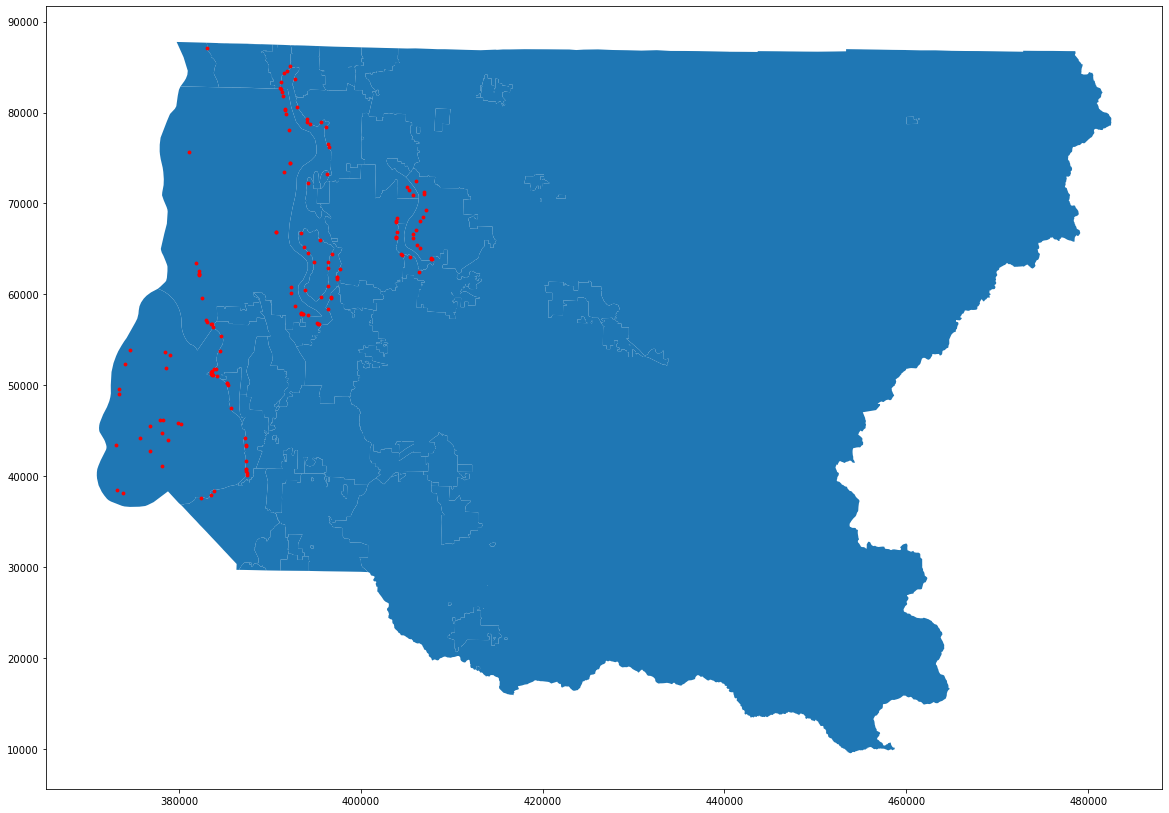

In [50]:
fig, ax = plt.subplots(figsize=(20,20))
wf.plot(ax = ax , color = 'r',markersize = 8,zorder=2)
# wf_nan.plot(ax=ax,color='k',markersize = 5, zorder=3)
kc_cities_gdf.plot(ax=ax,zorder=1)

## Explore plotting

In [52]:
kc_cities_gdf.head()

,OBJECTID,JURIS,CITYNAME,SHAPE_Leng,SHAPE_Area,geometry,centroid,distance_seattle
0,1,AL,Algona,38144.667179,3.641105e+07,"POLYGON ((-122.24022 47.29353, -122.24307 47.2...",POINT (392791.391 32339.325),38210.789361
1,2,AU,Auburn,209231.046799,7.856892e+08,"POLYGON ((-122.22820 47.35395, -122.22546 47.3...",POINT (395834.289 35069.659),36245.361339
2,3,BA,Beaux Arts,6720.785802,2.274707e+06,"POLYGON ((-122.20276 47.58679, -122.20276 47.5...",POINT (397138.139 65993.350),11935.852118
3,4,BD,Black Diamond,6629.569588,2.412697e+06,"POLYGON ((-121.96191 47.28836, -121.96191 47.2...",POINT (414505.834 32499.483),47120.537344
4,5,BD,Black Diamond,85786.107116,1.983661e+08,"POLYGON ((-122.04854 47.34368, -122.04412 47.3...",POINT (410359.775 35532.648),42216.811494


In [53]:
#m = folium.Map(location=[47.55, -121.9], zoom_start=9.5, tiles='CartoDB positron')
#for _, r in kc_cities_gdf.iterrows():
#    # Without simplifying the representation of each borough,
#    # the map might not be displayed
#    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
#    geo_j = sim_geo.to_json()
#    geo_j = folium.GeoJson(data=geo_j,
#                           style_function=lambda x: {'fillColor': 'orange'})
#    folium.Popup(r['CITYNAME']).add_to(geo_j)
#    geo_j.add_to(m)
#m

In [54]:
#for _, r in housing_gdf_complete.iterrows():
#    lat = r['geometry'].y
#    lon = r['geometry'].x
#    folium.Marker(location=[lat, lon]).add_to(m)
#m